<a href="https://colab.research.google.com/github/Tao51/TTTC3213-Group-Project-ETL/blob/main/Group_Project_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP MEMBERS: 
- SWEETNIE WONG CHI LAM A170679
- CHEW YEE DHONG A170527
- NG YU TAO A170441

# 1.EXTRACT

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# urllib.request module is used to open URLs
# The Beautiful Soup package is used to extract data from html files

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
# specify the URL containing the dataset and pass it to urlopen() to get the html of the page
url = "https://www.carlist.my/"
html = urlopen(url)

In [ ]:
import requests
page = requests.get("https://www.carlist.my/")
page

<Response [200]>

In [ ]:
html

In [ ]:
# create a Beautiful Soup object from the html
# pass the html to the BeautifulSoup() function
# Beautiful Soup package is used to parse the html

soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [ ]:
# soup object allows you to extract interesting information about the scrap website 
# Get the title
title = soup.title
print(title)

<title>Find new &amp; used cars for sale in Malaysia - Carlist.my</title>


In [ ]:
# get the text of the webpage
# Print out the text
text = soup.get_text()
print(soup.text)






Find new & used cars for sale in Malaysia - Carlist.my



    window.dataLayer = window.dataLayer || [];

    function gtag() {
        dataLayer.push(arguments);
    }

    gtag('js', new Date());

    gtag('config', 'UA-7749517-1', {'optimize_id': 'GTM-PRFGB2M', 'send_page_view': false});
 













































window.googleGACode="UA-7749517-1";

!function(){var t=document.createElement("script");t.src="https://www.icarasia.com/paths/paths.js",t.id="paths",t.async=!0,document.addEventListener("DOMContentLoaded",(function(n){document.body.appendChild(t)})),window.tmlPush=function(t){return void 0!==window.tml&&"function"==typeof window.tml.push&&"object"==typeof t&&window.tml.push(t)},window.gaPush=function(t){var n="object"==typeof t?Object.assign({},t):{};return n.t="ga",window.tmlPush(n),void 0!==window.dataLayer&&"function"==typeof window.dataLayer.push&&window.dataLayer.push(t)}}();

window.params={};

window.params.contactLanguage={};

window.params

In [ ]:
# use the find_all() method of soup to extract useful html tags within a webpage
soup.find_all('a')

[<a class="js-part-language-switcher js-part-language-switcher--en text--white js-part-language-switcher--active is--active" href="https://www.carlist.my/" lang="en">English</a>,
 <a class="js-part-language-switcher js-part-language-switcher--ms text--white " href="https://www.carlist.my/ms" lang="ms">Bahasa Malaysia</a>,
 <a class="js-part-language-switcher js-part-language-switcher--zh text--white " href="https://www.carlist.my/zh" lang="zh">中文</a>,
 <a class="header__toggle js-mobile-menu-toggle visuallyhidden--desk flex flex--items-center" href="javascript:void(0)">
 <div class="icon icon--md-menu text--white"></div>
 </a>,
 <a class="header__logo flex__right-auto palm-flush" href="https://www.carlist.my"><img alt="Carlist.my" class="block" height="40" src="https://carlist.icarcdn.com/images/logo-w.svg"/></a>,
 <a class="header__logo-big hidden soft-half--ends" href="https://www.carlist.my"><img alt="Carlist.my" class="block" height="60" src="https://carlist.icarcdn.com/images/logo

In [ ]:
# use a for loop and the get('"href") method 
# to extract and print out only hyperlinks

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

https://www.carlist.my/
https://www.carlist.my/ms
https://www.carlist.my/zh
javascript:void(0)
https://www.carlist.my
https://www.carlist.my
https://www.carlist.my/account/listing/create-selection
#js-mobile-sort__trigger
#js-mobile-show-search
https://www.carlist.my
https://www.carlist.my/cars-for-sale/malaysia
https://www.carlist.my/cars-for-sale/malaysia
https://www.carlist.my/used-cars-for-sale/malaysia
https://www.carlist.my/new-cars-for-sale/malaysia
https://www.carlist.my/recon-cars-for-sale/malaysia
https://www.carlist.my/kereta-murah
/cars-for-sale/malaysia?hotdeal=true
/cars-for-sale/malaysia?booknowpaylater=true
#
https://www.carlist.my/form/carlist-essential-services
https://www.carlist.my/form/buyer-protection
#
/cars-for-sale/malaysia?bmw=true
https://dealer.carlist.my/
#
https://www.carlist.my/account/listing/create-selection
https://www.carlist.my/faq#selling
#
https://bid.carlist.my/
https://www.carlist.my/new-car
https://newcar.carlist.my
https://www.carlist.my/new-ca

In [ ]:
# to check the numbers of data that can be extracted. There are 2 data that can be scraped which are latest new car models and most popular car models
categories=soup.find_all('div',attrs={"class":"new-car-showroom"})
len(categories)

2

In [ ]:
# the data of latest new car models
latest=categories[0]
from IPython.core.display import display,HTML
display(HTML(latest.prettify())) 

In [ ]:
#save all data in array
latestcar=[]
latestcar=[(lt.text.strip("\n ").replace(",", "")) 
    for lt in latest.find_all("div" ,attrs={"class": "soft-half--sides"})]
latestcar

['Audi A4\n\n\n            RM 206525            -RM 297116',
 'Perodua Axia\n\n\n            RM 23367            -RM 41427',
 'Perodua Myvi\n\n\n            RM 41292            -RM 52197',
 'Hyundai Elantra\n\n\n            RM 158888            -RM 158888',
 'Honda CR-V\n\n\n            RM 144630            -RM 168466',
 'Honda City\n\n\n            RM 74191            -RM 86561',
 'Toyota Vios\n\n\n            RM 76101            -RM 88677',
 'Honda Civic\n\n\n            RM 109327            -RM 134661',
 'BMW X7\n\n\n            RM 861847            -RM 861847',
 'BMW X2\n\n\n            RM 328800            -RM 400000',
 'BMW X6 M\n\n\n            RM 1168918            -RM 1168918',
 'BMW X5\n\n\n            RM 440745            -RM 440745',
 'BMW X4\n\n\n            RM 364062            -RM 364062',
 'BMW X3\n\n\n            RM 304235            -RM 886552',
 'BMW X1\n\n\n            RM 208368            -RM 208368',
 'BMW 3 Series\n\n\n            RM 241794            -RM 286187'

In [ ]:
#find the latest cars' names and save it in one array named latestcars
latestcars=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in latest.find_all("a")]
latestcars

['',
 'Audi A4',
 '',
 'Perodua Axia',
 '',
 'Perodua Myvi',
 '',
 'Hyundai Elantra',
 '',
 'Honda CR-V',
 '',
 'Honda City',
 '',
 'Toyota Vios',
 '',
 'Honda Civic',
 '',
 'BMW X7',
 '',
 'BMW X2',
 '',
 'BMW X6 M',
 '',
 'BMW X5',
 '',
 'BMW X4',
 '',
 'BMW X3',
 '',
 'BMW X1',
 '',
 'BMW 3 Series',
 '',
 'Porsche Macan',
 '',
 'Subaru Forester',
 '',
 'Nissan Almera',
 '',
 'Audi A6',
 '',
 'Toyota Alphard',
 '',
 'Toyota Yaris',
 '',
 'Proton Exora',
 '',
 'Proton Iriz',
 '',
 'Mercedes-Benz C-Class']

In [ ]:
while '' in latestcars:
  latestcars.remove("")

latestcars

['Audi A4',
 'Perodua Axia',
 'Perodua Myvi',
 'Hyundai Elantra',
 'Honda CR-V',
 'Honda City',
 'Toyota Vios',
 'Honda Civic',
 'BMW X7',
 'BMW X2',
 'BMW X6 M',
 'BMW X5',
 'BMW X4',
 'BMW X3',
 'BMW X1',
 'BMW 3 Series',
 'Porsche Macan',
 'Subaru Forester',
 'Nissan Almera',
 'Audi A6',
 'Toyota Alphard',
 'Toyota Yaris',
 'Proton Exora',
 'Proton Iriz',
 'Mercedes-Benz C-Class']

In [ ]:
#find the latest cars' prices and save it in one array named latestprices 
latestprices=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in latest.find_all("div",attrs={"class": "card__price"})]
latestprices

['RM 206525            -RM 297116',
 'RM 23367            -RM 41427',
 'RM 41292            -RM 52197',
 'RM 158888            -RM 158888',
 'RM 144630            -RM 168466',
 'RM 74191            -RM 86561',
 'RM 76101            -RM 88677',
 'RM 109327            -RM 134661',
 'RM 861847            -RM 861847',
 'RM 328800            -RM 400000',
 'RM 1168918            -RM 1168918',
 'RM 440745            -RM 440745',
 'RM 364062            -RM 364062',
 'RM 304235            -RM 886552',
 'RM 208368            -RM 208368',
 'RM 241794            -RM 286187',
 'RM 439151            -RM 439151',
 'RM 149788            -RM 177788',
 'RM 79906            -RM 85715',
 'RM 309375            -RM 568927',
 'RM 443000            -RM 510343',
 'RM 69576            -RM 82475',
 'RM 57300            -RM 64800',
 'RM 36200            -RM 49900',
 'RM 250283            -RM 401115']

In [ ]:
# the data of most popular new car models
popular=categories[1]
from IPython.core.display import display,HTML
display(HTML(popular.prettify())) 

In [ ]:
#save all data of popular new car models in array
popularcar=[]
popularcar=[(p.text.strip("\n ").replace(",", "")) 
    for p in popular.find_all("div" ,attrs={"class": "soft-half--sides"})]

popularcar

['Perodua Myvi\n\n\n            RM 41292            -RM 52197',
 'Perodua Axia\n\n\n            RM 23367            -RM 41427',
 'Proton Saga\n\n\n            RM 32800            -RM 39800',
 'Toyota Yaris\n\n\n            RM 69576            -RM 82475',
 'Honda City\n\n\n            RM 74191            -RM 86561',
 'Mazda CX-5\n\n\n            RM 132404            -RM 174852',
 'Ford Mustang\n\n\n            RM 461271            -RM 565626',
 'Audi A4\n\n\n            RM 206525            -RM 297116',
 'Proton X50\n\n\n            RM 79200            -RM 103300',
 'Ford Ranger\n\n\n            RM 95888            -RM 208888',
 'Perodua Bezza\n\n\n            RM 34580            -RM 49980',
 'Honda Civic\n\n\n            RM 109327            -RM 134661',
 'Proton Persona\n\n\n            RM 42100            -RM 53700',
 'Toyota C-HR\n\n\n            RM 150000            -RM 150000',
 'Toyota Vios\n\n\n            RM 76101            -RM 88677',
 'Hyundai Elantra\n\n\n            RM 158

In [ ]:
#find the latest cars' prices and save it in one array called popularcars
popularcars=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in popular.find_all("a")]
popularcars

['',
 'Perodua Myvi',
 '',
 'Perodua Axia',
 '',
 'Proton Saga',
 '',
 'Toyota Yaris',
 '',
 'Honda City',
 '',
 'Mazda CX-5',
 '',
 'Ford Mustang',
 '',
 'Audi A4',
 '',
 'Proton X50',
 '',
 'Ford Ranger',
 '',
 'Perodua Bezza',
 '',
 'Honda Civic',
 '',
 'Proton Persona',
 '',
 'Toyota C-HR',
 '',
 'Toyota Vios',
 '',
 'Hyundai Elantra',
 '',
 'Honda HR-V',
 '',
 'Proton Exora',
 '',
 'Proton Iriz',
 '',
 'Honda CR-V',
 '',
 'Mazda 2',
 '',
 'Nissan Almera',
 '',
 'Perodua Aruz',
 '',
 'Haval H1',
 '',
 'Toyota Hilux']

In [ ]:
while '' in popularcars:
  popularcars.remove('')

popularcars

['Perodua Myvi',
 'Perodua Axia',
 'Proton Saga',
 'Toyota Yaris',
 'Honda City',
 'Mazda CX-5',
 'Ford Mustang',
 'Audi A4',
 'Proton X50',
 'Ford Ranger',
 'Perodua Bezza',
 'Honda Civic',
 'Proton Persona',
 'Toyota C-HR',
 'Toyota Vios',
 'Hyundai Elantra',
 'Honda HR-V',
 'Proton Exora',
 'Proton Iriz',
 'Honda CR-V',
 'Mazda 2',
 'Nissan Almera',
 'Perodua Aruz',
 'Haval H1',
 'Toyota Hilux']

In [ ]:
#find the latest cars' prices and save it in one array called popularprices
popularprices=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in popular.find_all("div",attrs={"class": "card__price"})]
popularprices

['RM 41292            -RM 52197',
 'RM 23367            -RM 41427',
 'RM 32800            -RM 39800',
 'RM 69576            -RM 82475',
 'RM 74191            -RM 86561',
 'RM 132404            -RM 174852',
 'RM 461271            -RM 565626',
 'RM 206525            -RM 297116',
 'RM 79200            -RM 103300',
 'RM 95888            -RM 208888',
 'RM 34580            -RM 49980',
 'RM 109327            -RM 134661',
 'RM 42100            -RM 53700',
 'RM 150000            -RM 150000',
 'RM 76101            -RM 88677',
 'RM 158888            -RM 158888',
 'RM 104000            -RM 118582',
 'RM 57300            -RM 64800',
 'RM 36200            -RM 49900',
 'RM 144630            -RM 168466',
 'RM 100770            -RM 100770',
 'RM 79906            -RM 85715',
 'RM 68526            -RM 73226',
 'RM 65852            -RM 65852',
 'RM 83082            -RM 115736']

In [ ]:
# to check the news length from websites
news=soup.find_all('div',attrs={"class":"grid"})
len(news)

12

In [ ]:
# show the scarped news from website. The news are separated into 2 parts based on the website design. The inspect structure is different for both news.
#Therefore, there are different steps in scraping the 2 part news. The first news is called news1 while the second news is called news2.
new1=news[2]
from IPython.core.display import display,HTML
display(HTML(new1.prettify())) 

new2=news[3]
from IPython.core.display import display,HTML
display(HTML(new2.prettify())) 

In [ ]:
#find the details of news 1 to extract some important data
totalinfonew1=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in new1.find_all("a")]
totalinfonew1

['',
 'Saga vs Bezza – Yang Mana Satu Lebih Baik?',
 'Buying Guides',
 'Muhammad Sharil Tarmize',
 'read more']

In [ ]:
#title of news 1
a=totalinfonew1[1]
a

'Saga vs Bezza – Yang Mana Satu Lebih Baik?'

In [ ]:
# author of news 1
b=totalinfonew1[3]
b

'Muhammad Sharil Tarmize'

In [ ]:
c=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in new1.find_all("span", attrs="article__date milli")]
c

['January 07 2021']

In [ ]:
#paragraph for news 1
paragraphs=[(wp.text.strip("\n ").replace(",", "")) 
    for wp in new1.find_all("p")]
paragraphs


['Sedang mencari kereta sedan tempatan yang berpatutan sebagai kereta pertama anda? Banyak habiskan masa buat kajian namun masih buntu? Jangan risau kami faham.\xa0Bagi sesetengah pihak kereta merupakan satu keperluan berbanding kemahuan. Penting untuk mengutamakan ciri ciri seperti keselesaan keselamatan dan ketahanan untuk kegunaan harian.\xa0So Saga vs BezzaYang mana satu pilihan terbaik bagi mereka yang mencari kenderaan pertama? Bagi mereka yang baru mula bekerja dan sedang mencari kereta ... read more']

In [ ]:
#all the titles from news 2
titles2=[]
titles2=[(t.text.strip("\n ").replace(",", "")) 
    for t in new2.find_all("a" ,attrs={"class": "text--clamp"})]

titles2

['Proton X50 1.5L TGDi – Packaging Refinement and Power In A Small 3-Cylinder Engine',
 'iCarData: Perodua Proton Honda Toyota – Which Brand Has The Best Resale Value In Malaysia?',
 'Could E-Scooters Be The Answer to First/Last Mile Woes?',
 'Full House: Will The Perodua D55L Be Too Late To The SUV Party?']

In [ ]:
#all the authors and dates from news 2
info2=[]
info2=[(t.text.strip("\n ").replace(",", "")) 
    for t in new2.find_all("span")]

info2

['Arvind',
 '\xa0|\xa0',
 'October 05 2020',
 'Arvind',
 '\xa0|\xa0',
 'October 10 2020',
 'Adam Aubrey',
 '\xa0|\xa0',
 'November 06 2020',
 'Jim Kem',
 '\xa0|\xa0',
 'November 03 2020']

In [ ]:
#all the paragraphs from news 2
paragraphs2=[]
paragraphs2=[(t.text.strip("\n ").replace(",", "")) 
    for t in new2.find_all("div" ,attrs={"class": "text--clamp push-quarter--top float--left portable-one-whole"})]

paragraphs2

['The Proton X50 seems to dominate the automotive news cycle with everything from the tentative prices to the car’s suite of active safety systems ...',
 'Resale value is perhaps the third most important consideration for a majority of car buyers. Besides “can I afford to own and maintain the car the ...',
 "E-scooters are mostly used for leisure activities in Malaysia but perhaps it's time for them to serve a bigger\xa0purpose.The Malaysian government ...",
 'It’s now the second-to-last month of 2020 and we’ve still heard precious little about Perodua’s rumoured new model known so far to us by its ...']

In [ ]:
# author of news 2
aa=info2[0]
bb=info2[3]
cc=info2[6]
dd=info2[9]
print(aa,bb,cc,dd)


Arvind Arvind Adam Aubrey Jim Kem


In [ ]:
aaa=info2[2]
bbb=info2[5]
ccc=info2[8]
ddd=info2[11]
print(aaa,bbb,ccc,ddd)

October 05 2020 October 10 2020 November 06 2020 November 03 2020


In [ ]:
#save different data in different array. The scarped news consists of arrays which are title author, date and paragraph., 
title=[]
title.append(a)
title.extend(titles2)
title


['Saga vs Bezza – Yang Mana Satu Lebih Baik?',
 'Proton X50 1.5L TGDi – Packaging Refinement and Power In A Small 3-Cylinder Engine',
 'iCarData: Perodua Proton Honda Toyota – Which Brand Has The Best Resale Value In Malaysia?',
 'Could E-Scooters Be The Answer to First/Last Mile Woes?',
 'Full House: Will The Perodua D55L Be Too Late To The SUV Party?']

In [ ]:
author=[]
author.append(b)
author.append(aa)
author.append(bb)
author.append(cc)
author.append(dd)

author

['Muhammad Sharil Tarmize', 'Arvind', 'Arvind', 'Adam Aubrey', 'Jim Kem']

In [ ]:
date=[]
date.extend(c)
date.append(aaa)
date.append(bbb)
date.append(ccc)
date.append(ddd)
date

['January 07 2021',
 'October 05 2020',
 'October 10 2020',
 'November 06 2020',
 'November 03 2020']

In [ ]:
paragraph=[]
paragraph.extend(paragraphs)
paragraph.extend(paragraphs2)
paragraph

['Sedang mencari kereta sedan tempatan yang berpatutan sebagai kereta pertama anda? Banyak habiskan masa buat kajian namun masih buntu? Jangan risau kami faham.\xa0Bagi sesetengah pihak kereta merupakan satu keperluan berbanding kemahuan. Penting untuk mengutamakan ciri ciri seperti keselesaan keselamatan dan ketahanan untuk kegunaan harian.\xa0So Saga vs BezzaYang mana satu pilihan terbaik bagi mereka yang mencari kenderaan pertama? Bagi mereka yang baru mula bekerja dan sedang mencari kereta ... read more',
 'The Proton X50 seems to dominate the automotive news cycle with everything from the tentative prices to the car’s suite of active safety systems ...',
 'Resale value is perhaps the third most important consideration for a majority of car buyers. Besides “can I afford to own and maintain the car the ...',
 "E-scooters are mostly used for leisure activities in Malaysia but perhaps it's time for them to serve a bigger\xa0purpose.The Malaysian government ...",
 'It’s now the second-

In [ ]:
import pandas as pd

#dataframe for Info in news

dfNews=pd.DataFrame({'Title':title,'Author':author,'Date':date,'Paragraph':paragraph})
dfNews

,Title,Author,Date,Paragraph
0,Saga vs Bezza – Yang Mana Satu Lebih Baik?,Muhammad Sharil Tarmize,January 07 2021,Sedang mencari kereta sedan tempatan yang berp...
1,Proton X50 1.5L TGDi – Packaging Refinement an...,Arvind,October 05 2020,The Proton X50 seems to dominate the automotiv...
2,iCarData: Perodua Proton Honda Toyota – Which ...,Arvind,October 10 2020,Resale value is perhaps the third most importa...
3,Could E-Scooters Be The Answer to First/Last M...,Adam Aubrey,November 06 2020,E-scooters are mostly used for leisure activit...
4,Full House: Will The Perodua D55L Be Too Late ...,Jim Kem,November 03 2020,It’s now the second-to-last month of 2020 and ...


In [ ]:
Car=[]
Car.extend(latestcars)
Car.extend(popularcars)

price=[]
price.extend(latestprices)
price.extend(popularprices)

In [ ]:
#Dataframe for latest car
dfCar=pd.DataFrame({"Car Model":Car,"Price":price})
dfCarOri=dfCar
dfCarOri

,Car Model,Price
0,Audi A4,RM 206525 -RM 297116
1,Perodua Axia,RM 23367 -RM 41427
2,Perodua Myvi,RM 41292 -RM 52197
3,Hyundai Elantra,RM 158888 -RM 158888
4,Honda CR-V,RM 144630 -RM 168466
5,Honda City,RM 74191 -RM 86561
6,Toyota Vios,RM 76101 -RM 88677
7,Honda Civic,RM 109327 -RM 134661
8,BMW X7,RM 861847 -RM 861847
9,BMW X2,RM 328800 -RM 400000


In [ ]:
dfCar[['Lowest Price','Highest Price']]=dfCar['Price'].str.split('-',expand=True)
dfCar

,Car Model,Price,Lowest Price,Highest Price
0,Audi A4,RM 206525 -RM 297116,RM 206525,RM 297116
1,Perodua Axia,RM 23367 -RM 41427,RM 23367,RM 41427
2,Perodua Myvi,RM 41292 -RM 52197,RM 41292,RM 52197
3,Hyundai Elantra,RM 158888 -RM 158888,RM 158888,RM 158888
4,Honda CR-V,RM 144630 -RM 168466,RM 144630,RM 168466
5,Honda City,RM 74191 -RM 86561,RM 74191,RM 86561
6,Toyota Vios,RM 76101 -RM 88677,RM 76101,RM 88677
7,Honda Civic,RM 109327 -RM 134661,RM 109327,RM 134661
8,BMW X7,RM 861847 -RM 861847,RM 861847,RM 861847
9,BMW X2,RM 328800 -RM 400000,RM 328800,RM 400000


In [ ]:
dfCar=dfCar.drop(columns=['Price'])
dfCar

,Car Model,Lowest Price,Highest Price
0,Audi A4,RM 206525,RM 297116
1,Perodua Axia,RM 23367,RM 41427
2,Perodua Myvi,RM 41292,RM 52197
3,Hyundai Elantra,RM 158888,RM 158888
4,Honda CR-V,RM 144630,RM 168466
5,Honda City,RM 74191,RM 86561
6,Toyota Vios,RM 76101,RM 88677
7,Honda Civic,RM 109327,RM 134661
8,BMW X7,RM 861847,RM 861847
9,BMW X2,RM 328800,RM 400000


# 2.TRANSFORM

*In this phase, data cleaning, joining, normalization and visualization are performed on the dataset. *

**Data Cleaning**

There are 4 methods included in this part for data cleaning. These four methods are data formatting, data normalization, data binning and categorical data. 

In [ ]:
#Checking missing data
missing_data=dfCar.isnull()

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

Car Model
False    50
Name: Car Model, dtype: int64

Lowest Price
False    50
Name: Lowest Price, dtype: int64

Highest Price
False    50
Name: Highest Price, dtype: int64



In [ ]:
missing_data=dfNews.isnull()

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

Title
False    5
Name: Title, dtype: int64

Author
False    5
Name: Author, dtype: int64

Date
False    5
Name: Date, dtype: int64

Paragraph
False    5
Name: Paragraph, dtype: int64



Checking with isnull() function, we found out that no missing data in data frame

## 2.a.1. Data Formatting

In [ ]:
dfCar.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26     True
27    False
28     True
29     True
30    False
31    False
32     True
33    False
34    False
35    False
36     True
37    False
38    False
39     True
40     True
41    False
42     True
43     True
44     True
45    False
46     True
47    False
48    False
49    False
dtype: bool

Checking with duplicated function, we found that many duplicated car model name in data frame

In [ ]:
len(dfCar)

50

In [ ]:
#removing rows with same Car Model Name
dfCar.sort_values("Car Model",inplace=True)
dfCar.drop_duplicates(subset=['Car Model'], keep=False, inplace=True)
dfCar

,Car Model,Lowest Price,Highest Price
19,Audi A6,RM 309375,RM 568927
15,BMW 3 Series,RM 241794,RM 286187
14,BMW X1,RM 208368,RM 208368
9,BMW X2,RM 328800,RM 400000
13,BMW X3,RM 304235,RM 886552
12,BMW X4,RM 364062,RM 364062
11,BMW X5,RM 440745,RM 440745
10,BMW X6 M,RM 1168918,RM 1168918
8,BMW X7,RM 861847,RM 861847
31,Ford Mustang,RM 461271,RM 565626


In [ ]:
#After remove the duplicate Car model, it has only 26 car model in the website only
len(dfCar)

26

In [ ]:
#we remove the unit "RM" in the data and changed the name of column
#rename column
dfCar['Lowest Price']=dfCar['Lowest Price'].str.replace('RM',"")
dfCar['Lowest Price'].str.replace(" ","")

dfCar['Highest Price']=dfCar['Highest Price'].str.replace('RM',"")
dfCar['Highest Price'].str.replace(" ","")

dfCar.columns=['Car Model','Lowest Price (RM)','Highest Price (RM)']

#Change casing
dfCar['Car Model']=dfCar['Car Model'].str.upper()
dfCar

,Car Model,Lowest Price (RM),Highest Price (RM)
19,AUDI A6,309375,568927
15,BMW 3 SERIES,241794,286187
14,BMW X1,208368,208368
9,BMW X2,328800,400000
13,BMW X3,304235,886552
12,BMW X4,364062,364062
11,BMW X5,440745,440745
10,BMW X6 M,1168918,1168918
8,BMW X7,861847,861847
31,FORD MUSTANG,461271,565626


In [ ]:
dfCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 19 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car Model           26 non-null     object
 1   Lowest Price (RM)   26 non-null     object
 2   Highest Price (RM)  26 non-null     object
dtypes: object(3)
memory usage: 832.0+ bytes


In [ ]:
dfCar['Lowest Price (RM)']=pd.to_numeric(dfCar['Lowest Price (RM)'])
dfCar['Highest Price (RM)']=pd.to_numeric(dfCar['Highest Price (RM)'])
dfCar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 19 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car Model           26 non-null     object
 1   Lowest Price (RM)   26 non-null     int64 
 2   Highest Price (RM)  26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 832.0+ bytes


## 2.a.2 Data Normalization 

We are using min-max scalling technique to normalize data

In [ ]:
dfCar['Lowest Price (Normalized)']=(dfCar['Lowest Price (RM)']-dfCar['Lowest Price (RM)'].min())/(dfCar['Lowest Price (RM)'].max()-dfCar['Lowest Price (RM)'].min())
dfCar['Highest Price (Normalized)']=(dfCar['Highest Price (RM)']-dfCar['Highest Price (RM)'].min())/(dfCar['Highest Price (RM)'].max()-dfCar['Highest Price (RM)'].min())
dfCar

,Car Model,Lowest Price (RM),Highest Price (RM),Lowest Price (Normalized),Highest Price (Normalized)
19,AUDI A6,309375,568927,0.243439,0.468620
15,BMW 3 SERIES,241794,286187,0.183954,0.218212
14,BMW X1,208368,208368,0.154533,0.149292
9,BMW X2,328800,400000,0.260536,0.319010
13,BMW X3,304235,886552,0.238914,0.749923
12,BMW X4,364062,364062,0.291574,0.287182
11,BMW X5,440745,440745,0.359069,0.355096
10,BMW X6 M,1168918,1168918,1.000000,1.000000
8,BMW X7,861847,861847,0.729719,0.728043
31,FORD MUSTANG,461271,565626,0.377136,0.465696


## 2.a.3 Data Binning

In [ ]:
label=['Cheap','Affordable','Expensive']
dfCar['Level of Low Spec Price']= pd.qcut(dfCar["Lowest Price (RM)"],q=[0,1/3,2/3,1],labels=label)
dfCar['Level of High Spec Price']= pd.qcut(dfCar["Highest Price (RM)"],q=[0,1/3,2/3,1],labels=label)
title=['Car Model','Lowest Price (RM)',"Lowest Price (Normalized)",'Level of Low Spec Price','Highest Price (RM)',"Highest Price (Normalized)",'Level of High Spec Price']
dfCar=dfCar.reindex(columns=title)
dfCar

,Car Model,Lowest Price (RM),Lowest Price (Normalized),Level of Low Spec Price,Highest Price (RM),Highest Price (Normalized),Level of High Spec Price
19,AUDI A6,309375,0.243439,Expensive,568927,0.468620,Expensive
15,BMW 3 SERIES,241794,0.183954,Affordable,286187,0.218212,Affordable
14,BMW X1,208368,0.154533,Affordable,208368,0.149292,Affordable
9,BMW X2,328800,0.260536,Expensive,400000,0.319010,Affordable
13,BMW X3,304235,0.238914,Affordable,886552,0.749923,Expensive
12,BMW X4,364062,0.291574,Expensive,364062,0.287182,Affordable
11,BMW X5,440745,0.359069,Expensive,440745,0.355096,Expensive
10,BMW X6 M,1168918,1.000000,Expensive,1168918,1.000000,Expensive
8,BMW X7,861847,0.729719,Expensive,861847,0.728043,Expensive
31,FORD MUSTANG,461271,0.377136,Expensive,565626,0.465696,Expensive


In [ ]:
len(dfCar)

26

## 2.a.4 Categorical Data

In [ ]:
dfDummy=pd.get_dummies(dfCar[["Level of Low Spec Price","Level of High Spec Price"]])
dfDummy

,Level of Low Spec Price_Cheap,Level of Low Spec Price_Affordable,Level of Low Spec Price_Expensive,Level of High Spec Price_Cheap,Level of High Spec Price_Affordable,Level of High Spec Price_Expensive
19,0,0,1,0,0,1
15,0,1,0,0,1,0
14,0,1,0,0,1,0
9,0,0,1,0,1,0
13,0,1,0,0,0,1
12,0,0,1,0,1,0
11,0,0,1,0,0,1
10,0,0,1,0,0,1
8,0,0,1,0,0,1
31,0,0,1,0,0,1


In [ ]:
df=dfCar.merge(dfDummy,left_index=True,right_index=True)
df

,Car Model,Lowest Price (RM),Lowest Price (Normalized),Level of Low Spec Price,Highest Price (RM),Highest Price (Normalized),Level of High Spec Price,Level of Low Spec Price_Cheap,Level of Low Spec Price_Affordable,Level of Low Spec Price_Expensive,Level of High Spec Price_Cheap,Level of High Spec Price_Affordable,Level of High Spec Price_Expensive
19,AUDI A6,309375,0.243439,Expensive,568927,0.468620,Expensive,0,0,1,0,0,1
15,BMW 3 SERIES,241794,0.183954,Affordable,286187,0.218212,Affordable,0,1,0,0,1,0
14,BMW X1,208368,0.154533,Affordable,208368,0.149292,Affordable,0,1,0,0,1,0
9,BMW X2,328800,0.260536,Expensive,400000,0.319010,Affordable,0,0,1,0,1,0
13,BMW X3,304235,0.238914,Affordable,886552,0.749923,Expensive,0,1,0,0,0,1
12,BMW X4,364062,0.291574,Expensive,364062,0.287182,Affordable,0,0,1,0,1,0
11,BMW X5,440745,0.359069,Expensive,440745,0.355096,Expensive,0,0,1,0,0,1
10,BMW X6 M,1168918,1.000000,Expensive,1168918,1.000000,Expensive,0,0,1,0,0,1
8,BMW X7,861847,0.729719,Expensive,861847,0.728043,Expensive,0,0,1,0,0,1
31,FORD MUSTANG,461271,0.377136,Expensive,565626,0.465696,Expensive,0,0,1,0,0,1


In [ ]:
#make index based on car model

df=df.set_index("Car Model")
df.head()

,Lowest Price (RM),Lowest Price (Normalized),Level of Low Spec Price,Highest Price (RM),Highest Price (Normalized),Level of High Spec Price,Level of Low Spec Price_Cheap,Level of Low Spec Price_Affordable,Level of Low Spec Price_Expensive,Level of High Spec Price_Cheap,Level of High Spec Price_Affordable,Level of High Spec Price_Expensive
Car Model,,,,,,,,,,,,
AUDI A6,309375,0.243439,Expensive,568927,0.468620,Expensive,0,0,1,0,0,1
BMW 3 SERIES,241794,0.183954,Affordable,286187,0.218212,Affordable,0,1,0,0,1,0
BMW X1,208368,0.154533,Affordable,208368,0.149292,Affordable,0,1,0,0,1,0
BMW X2,328800,0.260536,Expensive,400000,0.319010,Affordable,0,0,1,0,1,0
BMW X3,304235,0.238914,Affordable,886552,0.749923,Expensive,0,1,0,0,0,1


## 2.b Data visualizatiion

## 2.b.1 Histogram

In [ ]:
#histogram

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math


Text(0.5, 1.0, 'Unnormalized lowest prices among car models')

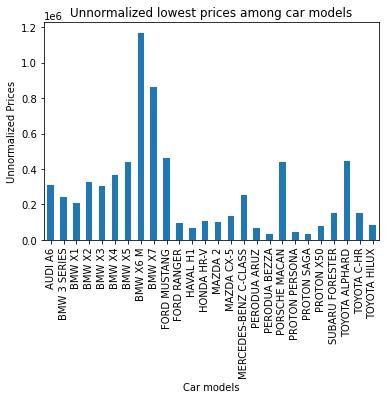

In [ ]:
# Plot histogram using the unnormalized lowest price column. The value on y-axis is too big. 
df['Lowest Price (RM)'].plot(kind='bar')
plt.ylabel('Unnormalized Prices')
plt.xlabel('Car models')
plt.title('Unnormalized lowest prices among car models')

Text(0.5, 1.0, 'Normalized lowest prices among car models')

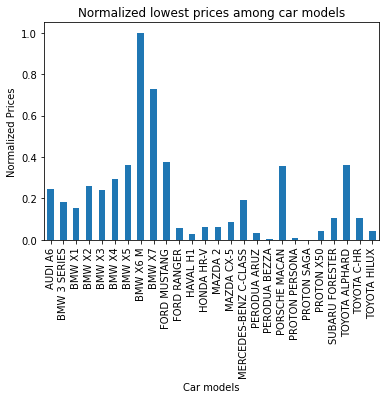

In [ ]:
# Plot the histogram using the normalized lowest price column The value of y-axis is in the range of 0 to 1. 
df['Lowest Price (Normalized)'].plot(kind='bar')
plt.ylabel('Normalized Prices')
plt.xlabel('Car models')
plt.title('Normalized lowest prices among car models')

## `2.b.2 Boxplot`

In [ ]:
#to find the details of unnormalized highest price column.
describe=df['Highest Price (RM)'].describe()
describe

count    2.600000e+01
mean     3.282429e+05
std      2.937334e+05
min      3.980000e+04
25%      1.064090e+05
50%      2.086280e+05
75%      4.403465e+05
max      1.168918e+06
Name: Highest Price (RM), dtype: float64

In [ ]:
#turn data to array
highpricearray=np.array(describe)
highpricearray

array([2.60000000e+01, 3.28242885e+05, 2.93733424e+05, 3.98000000e+04,
       1.06409000e+05, 2.08628000e+05, 4.40346500e+05, 1.16891800e+06])

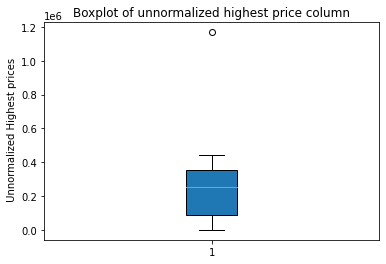

In [ ]:
#boxplot
colors=['blue']
plt.boxplot(highpricearray,patch_artist=True)
plt.title('Boxplot of unnormalized highest price column')
plt.ylabel('Unnormalized Highest prices')
plt.show()

The data of unnormalized highest price column is high enough to form a great boxplot. The lower and higher quartile, median, min and max value can be clearly seen from the boxplot above.  

In [ ]:
# to know the details of normalized highest price column
describe=df['Highest Price (Normalized)'].describe()
describe

count    26.000000
mean      0.255459
std       0.260144
min       0.000000
25%       0.058992
50%       0.149522
75%       0.354743
max       1.000000
Name: Highest Price (Normalized), dtype: float64

In [ ]:
#turn data to array
highpricearray=np.array(describe)
highpricearray

array([26.        ,  0.25545858,  0.26014413,  0.        ,  0.05899206,
        0.14952202,  0.35474282,  1.        ])

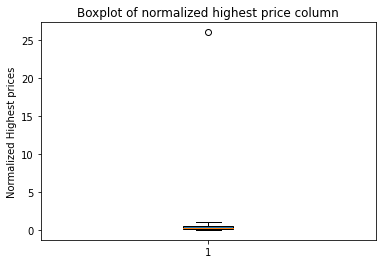

In [ ]:
#boxplot
colors=['blue']
plt.boxplot(highpricearray,patch_artist=True)
plt.title('Boxplot of normalized highest price column')
plt.ylabel('Normalized Highest prices')
plt.show()


From the boxplot above, since the value of normalized highest price is too small(within the range of 0 to 1), thus the boxplot could not show the details of normalized highest price properly. It failed to form a great boxplot.

## 2.b.3 Scatterplot

Use column lowest price and column highest price to create a scatterplot. Two data can be compared and shown clearly in this scatterplot. 

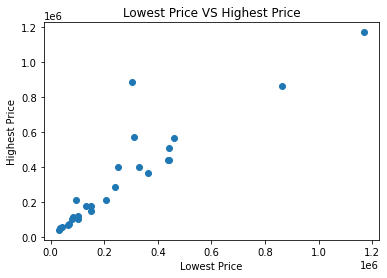

In [ ]:
#scatterplot
plt.scatter(df['Lowest Price (RM)'],df['Highest Price (RM)'])
plt.title('Lowest Price VS Highest Price')
plt.xlabel('Lowest Price')
plt.ylabel('Highest Price')
plt.show()

Text(0, 0.5, 'Highest price')

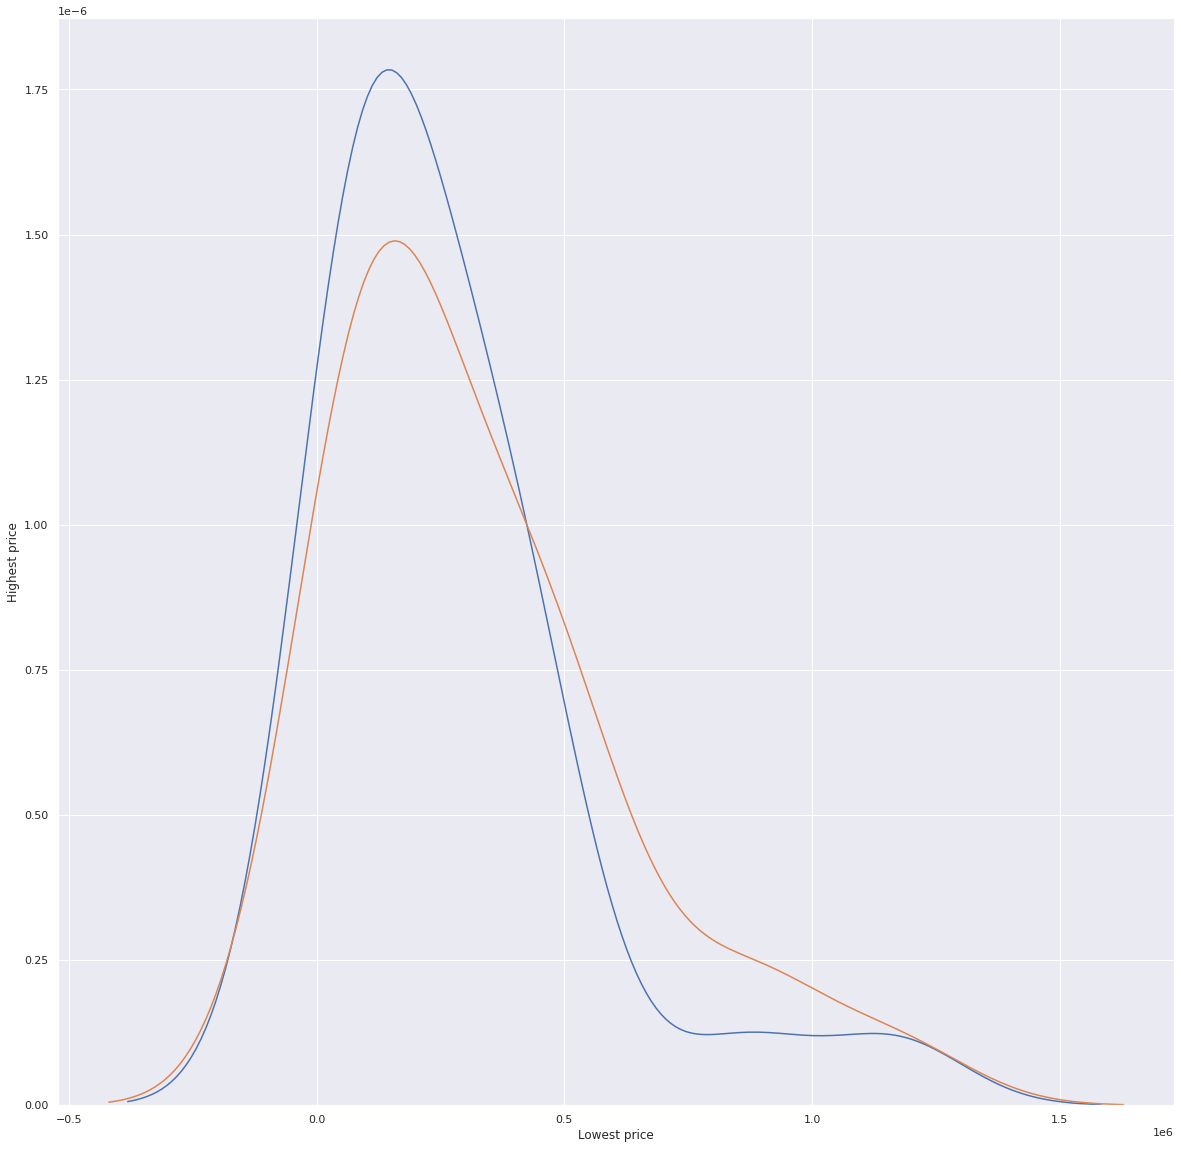

In [ ]:
# graph using seaborn 
import seaborn as sns
sns.kdeplot((df['Lowest Price (RM)']), label='Lowest Price', shade=False)
sns.kdeplot((df['Highest Price (RM)']), label='Highest Price', shade=False)
sns.set(rc={'figure.figsize':(20,20)})
plt.xlabel('Lowest price');
plt.ylabel('Highest price')

# 3.LOAD

In [ ]:
df.to_csv('groupprojectETL.csv',encoding='utf-8',index=False)
clean_df=pd.read_csv("groupprojectETL.csv")
clean_df

,Lowest Price (RM),Lowest Price (Normalized),Level of Low Spec Price,Highest Price (RM),Highest Price (Normalized),Level of High Spec Price,Level of Low Spec Price_Cheap,Level of Low Spec Price_Affordable,Level of Low Spec Price_Expensive,Level of High Spec Price_Cheap,Level of High Spec Price_Affordable,Level of High Spec Price_Expensive
0,309375,0.243439,Expensive,568927,0.468620,Expensive,0,0,1,0,0,1
1,241794,0.183954,Affordable,286187,0.218212,Affordable,0,1,0,0,1,0
2,208368,0.154533,Affordable,208368,0.149292,Affordable,0,1,0,0,1,0
3,328800,0.260536,Expensive,400000,0.319010,Affordable,0,0,1,0,1,0
4,304235,0.238914,Affordable,886552,0.749923,Expensive,0,1,0,0,0,1
5,364062,0.291574,Expensive,364062,0.287182,Affordable,0,0,1,0,1,0
6,440745,0.359069,Expensive,440745,0.355096,Expensive,0,0,1,0,0,1
7,1168918,1.000000,Expensive,1168918,1.000000,Expensive,0,0,1,0,0,1
8,861847,0.729719,Expensive,861847,0.728043,Expensive,0,0,1,0,0,1
9,461271,0.377136,Expensive,565626,0.465696,Expensive,0,0,1,0,0,1
